In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
model_folder = "../training/saved/2024-03-20/2_2_8_octaves"
archive = np.load(model_folder + "/predictions_6_epoch.npz")
y_pred = archive["y_pred"]
y_gt = archive["y_gt"]

In [21]:
def tab_to_pitch(tab):
    result = []
    open_pitch_values = [40, 45, 50, 55, 59, 64]
    for index, string_vector in enumerate(tab):
        fret_index = np.argmax(string_vector)
        #fret_index = 0 means that the string is muted
        if fret_index > 0:
            midi_value = fret_index + open_pitch_values[index] - 1
            if midi_value not in result:
                result.append(midi_value)
    return result

In [22]:
pred = []
gt = []

for i in range(len(y_gt)):
    pred_pitches = tab_to_pitch(y_pred[i])
    gt_pitches = tab_to_pitch(y_gt[i])
    pred_pitches.sort()
    gt_pitches.sort()

    #add 0 if array size does not match

    if len(pred_pitches) > len(gt_pitches):
        gt_pitches += [0] * (len(pred_pitches) - len(gt_pitches))
    elif len(gt_pitches) > len(pred_pitches):
        pred_pitches += [0] * (len(gt_pitches) - len(pred_pitches))

    pred += pred_pitches
    gt += gt_pitches

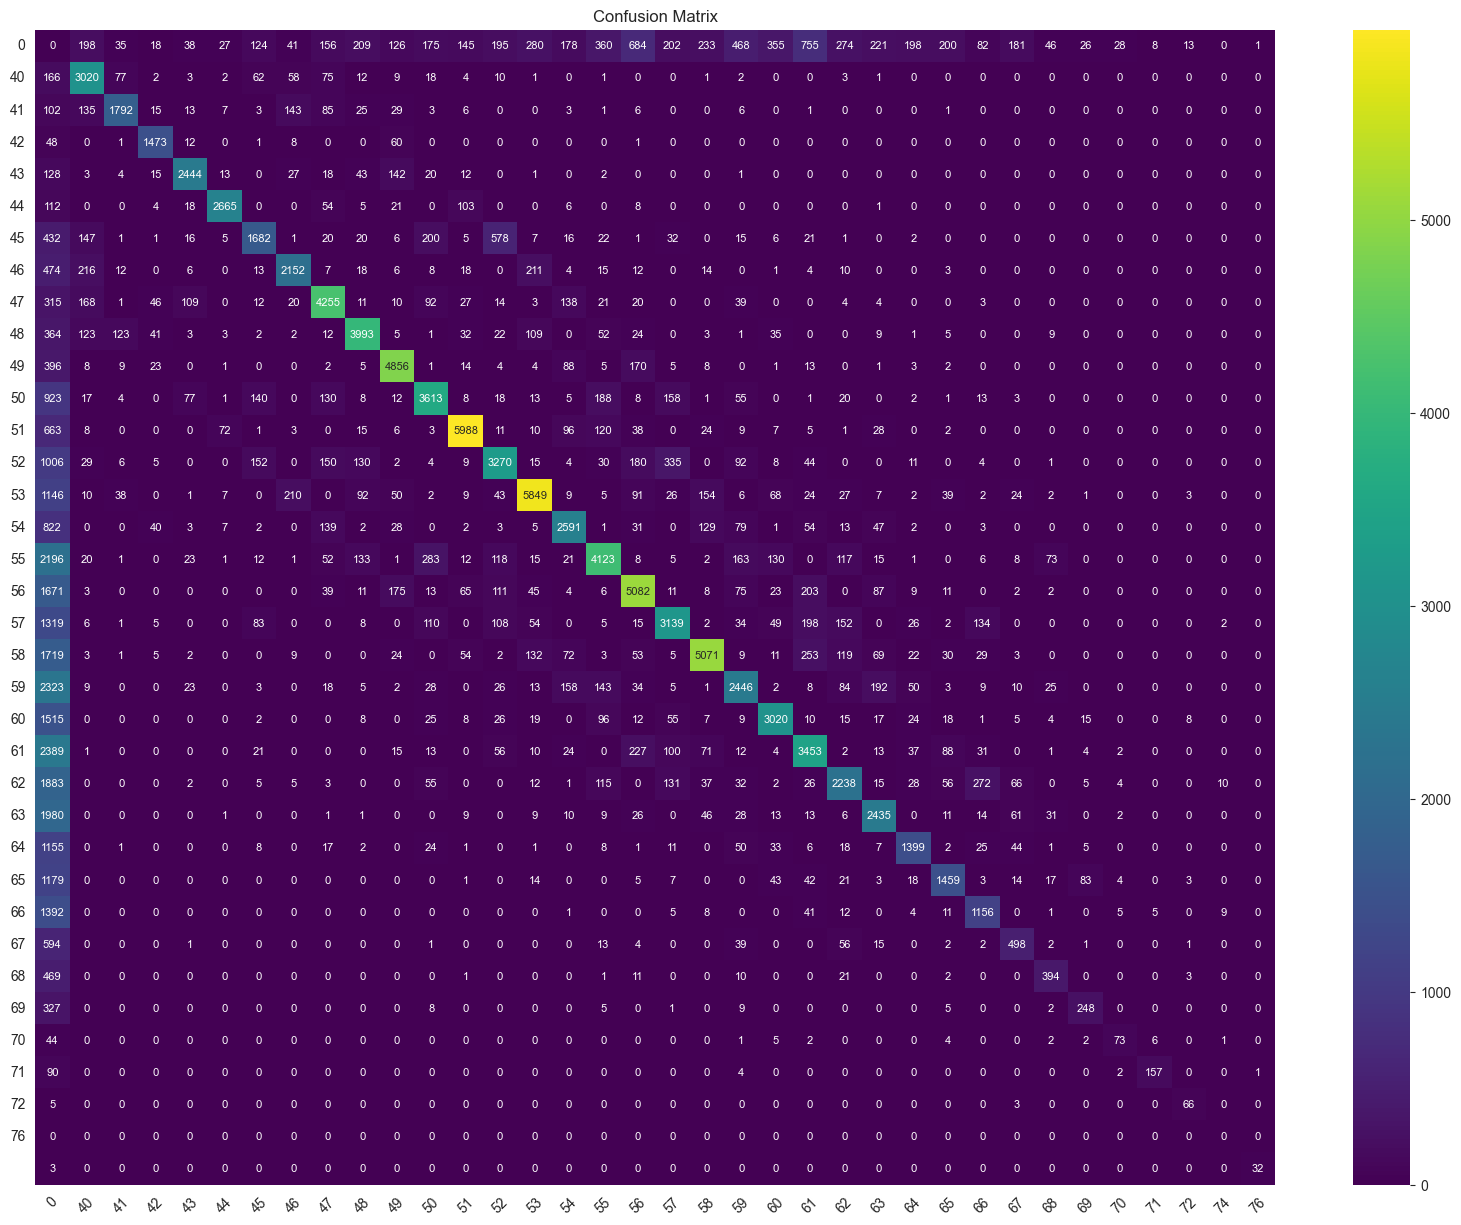

In [24]:

pred = np.array(pred)
gt = np.array(gt)

conf_matrix = confusion_matrix(gt, pred)
table = pd.DataFrame(conf_matrix)

plt.figure(figsize=(20, 15))
sns.heatmap(table, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 8})
plt.xticks(ticks=np.arange(len(np.unique(pred))) + 0.5, labels=np.unique(pred), rotation=45)
plt.yticks(ticks=np.arange(len(np.unique(gt))) + 0.5, labels=np.unique(gt), rotation=0)
plt.title('Confusion Matrix')
plt.show()
